# Descriptive Statistics

## Calculating Descriptive Statistics

In [18]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [20]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendency

In [21]:
mean_ = sum(x) / len(x)
mean_

8.7

In [22]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [23]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [24]:
mean_ = np.mean(y)
mean_

8.7

In [25]:
mean_ = y.mean()
mean_

8.7

In [26]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [27]:
np.nanmean(y_with_nan)

8.7

In [28]:
mean_ = z.mean()
mean_

8.7

In [29]:
z_with_nan.mean()

8.7

## Weighted Mean

In [30]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [31]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [32]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [33]:
(w * y).sum() / w.sum()

6.95

## Harmonic Mean

In [34]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [35]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [36]:
scipy.stats.hmean(y)

2.7613412228796843

In [37]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean


In [38]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [39]:
scipy.stats.gmean(y)

4.67788567485604

In [40]:
scipy.stats.gmean(z)

4.67788567485604

## Median


In [41]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [42]:
x

[8.0, 1, 2.5, 4, 28.0]

In [43]:
statistics.median_low(x[:-1])

2.5

In [44]:
statistics.median_high(x[:-1])

4

In [45]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [46]:
median_ = np.median(y)
print(median_)

4.0


In [47]:
median_ = np.median(y[:-1])
print(median_)

3.25


## Mode

In [48]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [49]:
mode_ = statistics.mode(u)
mode_

2

In [50]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=2, count=2)

In [51]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=12, count=3)

In [52]:
print(mode_.mode)
print(mode_.count)


12
3


In [53]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measures of Variability

In [54]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [55]:
var_ = statistics.variance(x)
var_

123.2

In [56]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [57]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [58]:
z.var(ddof=1)

123.19999999999999

## Standard Deviation

In [59]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [60]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [61]:
np.std(y, ddof=1)

11.099549540409285

In [62]:
y.std(ddof=1)

11.099549540409285

In [63]:
z.std(ddof=1)

11.099549540409285

In [64]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [65]:
skew_

1.9470432273905929

In [66]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [67]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [68]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [69]:
z_with_nan.skew()

1.9470432273905924

## Percentiles

In [70]:
#on python

## Visualizing Data (Optional)


### Box PLot

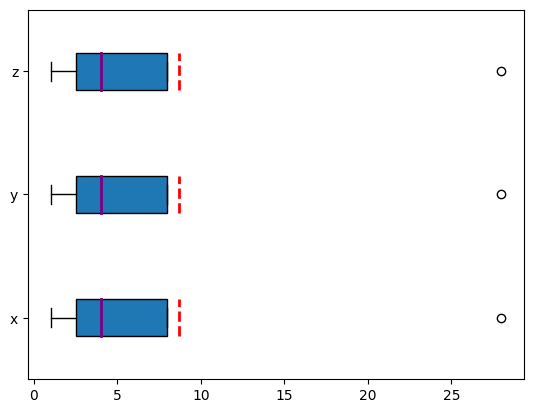

In [71]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,           labels=('x', 'y', 'z'), patch_artist=True,           medianprops={'linewidth': 2, 'color': 'purple'},           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

### Histograms

In [72]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([2, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [73]:
bin_edges

array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ])

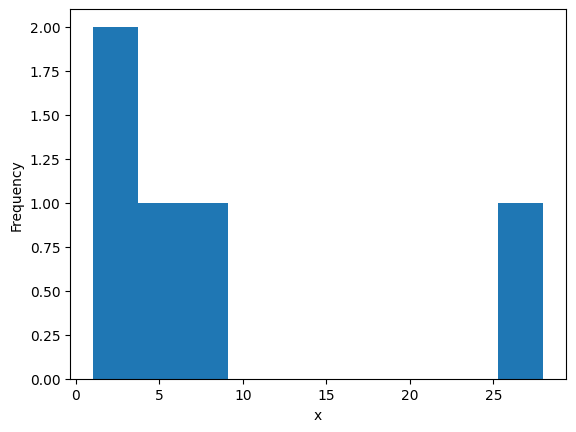

In [74]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

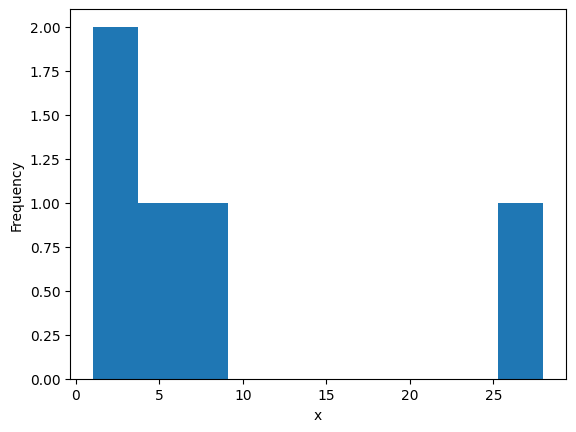

In [75]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

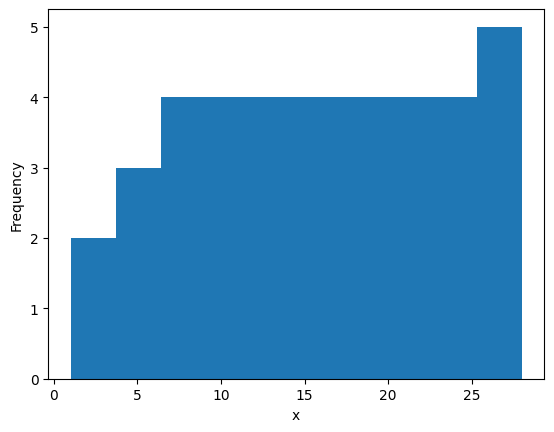

In [76]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

### Pie Charts

In [77]:
x, y, z = 128, 256, 1024

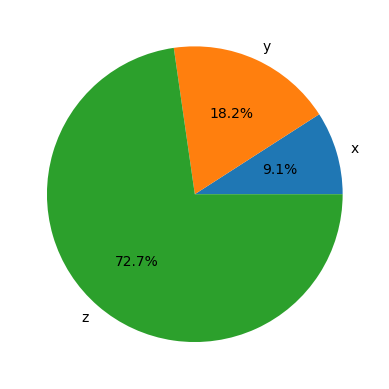

In [78]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

### Bar Charts

In [85]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

ValueError: 'yerr' must not contain negative values

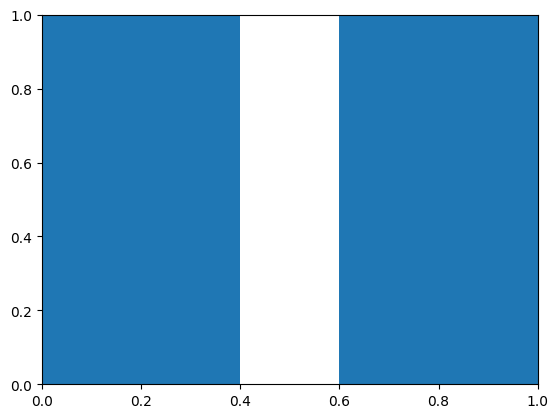

In [84]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [80]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}

SyntaxError: unterminated string literal (detected at line 4) (4280200626.py, line 4)

NameError: name 'intercept' is not defined

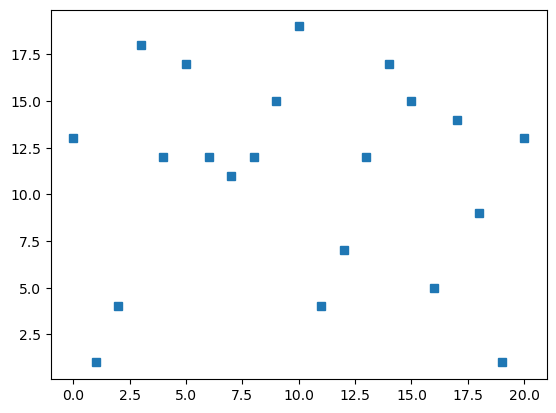

In [79]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

NameError: name 'intercept' is not defined

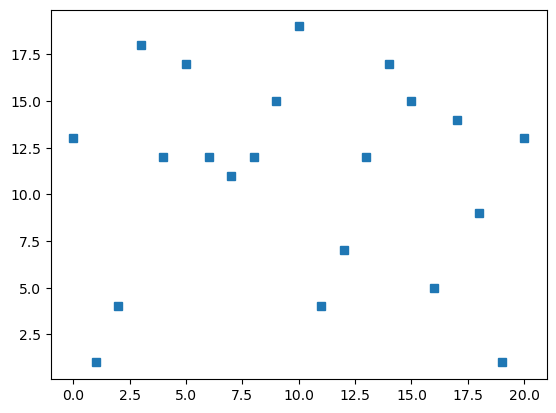

In [81]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

In [82]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    for j in range(2):        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()


SyntaxError: invalid syntax (4285478463.py, line 8)

In [83]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    for j in range(2):        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

SyntaxError: invalid syntax (3787273902.py, line 8)